In [35]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [291]:
# Define parameters here
gamma = 2*np.pi*20e6 #linewidth in cyclical units
omega_0 = 1
args = {'theta':np.pi, 'tau':10e-11}
N_pairs = 3

#time steps over which to solve the system dynamics
t = np.linspace(0, 500e-11, 1000)


In [292]:
#define any necessary functions here
def pulse1(t, args):
    return args['theta']/args['tau']/np.cosh(np.pi*(t - args['rep_period'])/args['tau']) 

def pulse2(t, args):
        return args['theta']/args['tau']/np.cosh(np.pi*(t - args['pulse_sep'] - args['rep_period'])/args['tau']) 


In [293]:
#Hamiltonian and basis states
H_atom = -omega_0*sigmaz()/2.
H_int = -sigmax()/2.
H = [H_atom,[H_int,pulse1],[H_int,pulse2]]

#define operators

P_up = Qobj(np.array([[1,0],[0,0]]))
P_down = Qobj(np.array([[0,0],[0,1]]))

#collapse operators
decay = np.sqrt(gamma)*sigmam() #i think this acts like spontaneous decay of the excited state. 

c_ops = [decay]

In [294]:
ket = states.basis(2,1)

In [295]:
output = mesolve(H, ket, t, c_ops,[P_up, P_down], args = {'theta':np.pi, 'tau':10e-11, 'pulse_sep':237e-12, 'rep_period':0.0})


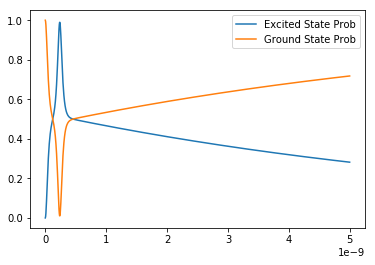

In [296]:
plt.plot(output.times, output.expect[0], label = 'Excited State Prob')
plt.plot(output.times, output.expect[1], label = 'Ground State Prob')
plt.legend(loc=0)


In [298]:
i = 0
opts = Options(rhs_reuse=True)
args = {'theta':np.pi, 'tau':10e-11, 'pulse_sep':237e-12, 'rep_period':0.0}
while i < N_pairs:
    output = mcsolve(H, ket, t, c_ops, [P_up, P_down], args = args, options = opts)
    i += 1

10.0%. Run time:   2.04s. Est. time left: 00:00:00:18
20.0%. Run time:   3.79s. Est. time left: 00:00:00:15
30.0%. Run time:   5.60s. Est. time left: 00:00:00:13
40.0%. Run time:   7.31s. Est. time left: 00:00:00:10
50.0%. Run time:   9.12s. Est. time left: 00:00:00:09
60.0%. Run time:  10.87s. Est. time left: 00:00:00:07
70.0%. Run time:  12.61s. Est. time left: 00:00:00:05
80.0%. Run time:  14.36s. Est. time left: 00:00:00:03
90.0%. Run time:  16.09s. Est. time left: 00:00:00:01
100.0%. Run time:  17.93s. Est. time left: 00:00:00:00
Total run time:  17.99s
10.0%. Run time:   1.84s. Est. time left: 00:00:00:16
20.0%. Run time:   3.54s. Est. time left: 00:00:00:14
30.0%. Run time:   5.33s. Est. time left: 00:00:00:12
40.0%. Run time:   7.06s. Est. time left: 00:00:00:10
50.0%. Run time:   8.92s. Est. time left: 00:00:00:08
60.0%. Run time:  10.82s. Est. time left: 00:00:00:07
70.0%. Run time:  12.63s. Est. time left: 00:00:00:05
80.0%. Run time:  14.45s. Est. time left: 00:00:00:03
90.

1000

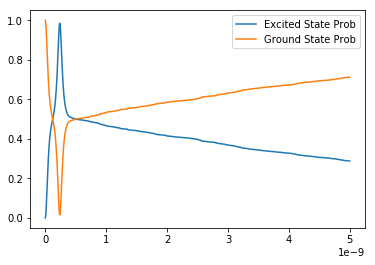

In [301]:
plt.plot(output.times, output.expect[0], label = 'Excited State Prob')
plt.plot(output.times, output.expect[1], label = 'Ground State Prob')
plt.legend(loc=0)
len(output.expect[0])